In [212]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector


In [213]:
def getSlope(line):
    x1,y1,x2,y2 = line[0]
    return (y2-y1)/(x2-x1)

In [214]:
#vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
#ret, frame = vcap.read()
my_img = cv2.imread('rov_pool.jpg')


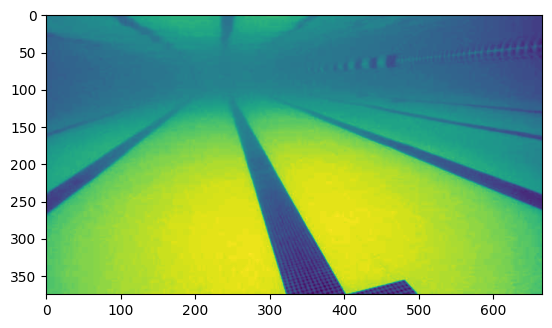

In [215]:
gray = cv2.cvtColor(my_img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

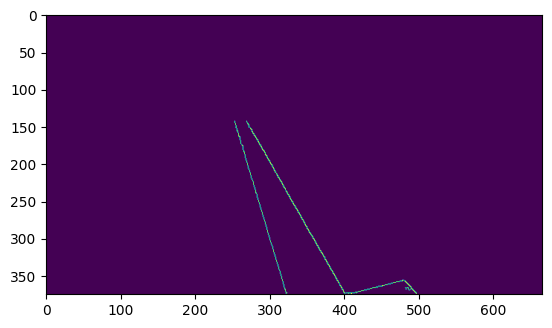

In [216]:
edges = cv2.Canny(gray, 50, 200, apertureSize=3) # detect edges
plt.imshow(edges)

In [217]:
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=30,
        ) # detect lines


In [218]:
def filterLines(lines):
    lineData = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        #print(line[0])
        slope = (y2 - y1)/(x2 - x1)
        xInt = (slope * x1 - y1) / slope
        lineData.append([slope, xInt, x1, y1, x2, y2])
        #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #print(lineData)

    cleanedLines = []
    for line in lineData:
        #loop thru cleanedLines, see if line with close enough slope is already within cleanedlines 
        canAdd = True
        for cleanedLine in cleanedLines:
            #if exists, set canAdd to false
            if abs(cleanedLine[1] - line[1]) < 3:
                canAdd = False

        if canAdd:
            cleanedLines.append(line)

    #print(cleanedLines)

    for line in cleanedLines:
        x1 = line[2]
        y1 =line[3]
        x2 = line[4]
        y2 =line[5]
        print(x1, y1, x2, y2)
        cv2.line(my_img, (x1, y1), (x2, y2), (0, 255, 0), 2)
filterLines(lines)

269 144 401 373
254 151 322 374


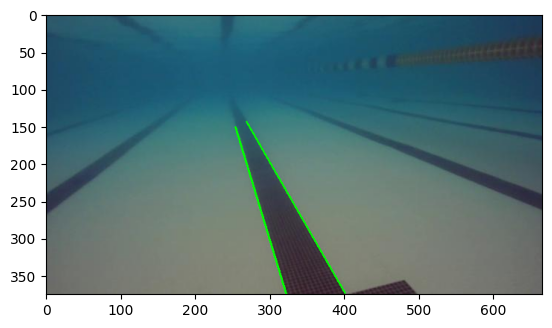

In [219]:

plt.imshow(cv2.cvtColor(my_img,cv2.COLOR_BGR2RGB))

In [220]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR-bGR2RGB))

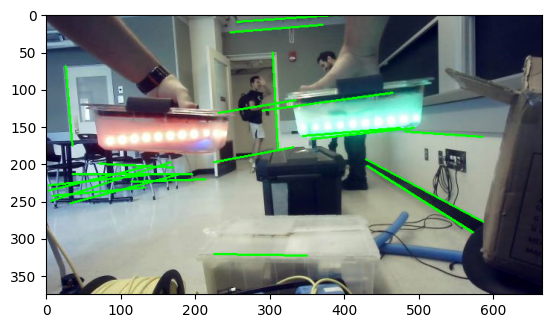

In [221]:
img = cv2.imread('image.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=10,
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(img)

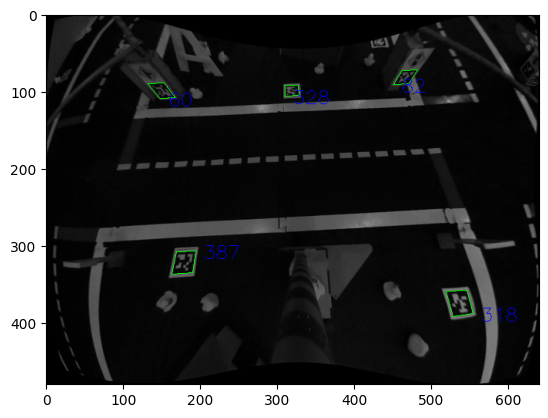

In [222]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
plt.imshow(color_img)
